
# **Title: Clothing Outfit (Fashion) Detection using transfer learning- Resnet 50**
## Author: Partho Adhikari

### Dataset: https://www.kaggle.com/datasets/agrigorev/clothing-dataset-full
  

In [1]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
labels = pd.read_csv('/kaggle/input/clothing-dataset-full/images.csv')
labels.head()

image  sender_id     label   kids
0  4285fab0-751a-4b74-8e9b-43af05deee22        124  Not sure  False
1  ea7b6656-3f84-4eb3-9099-23e623fc1018        148   T-Shirt  False
2  00627a3f-0477-401c-95eb-92642cbe078d         94  Not sure  False
3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43   T-Shirt  False
4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189     Shoes  False

In [3]:
labels['label'].value_counts()

T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Not sure       228
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip            12
Name: label, dtype: int64

# **Data Preprocessing**

## Import necessary libraries

In [4]:
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import plotly.express as px
        

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam_v2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout

from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model

In [5]:
dataset = '../input/clothing-dataset-full/images_compressed'
print(f"There are {len(os.listdir(dataset))} images in  dataset")

There are 5762 images in  dataset


In [6]:
file_names = os.listdir(dataset)
file_names[:10]

['d619091d-fc8d-4730-9f3c-2a042e876272.jpg',
 'b0d71fba-23a7-4912-b6c6-16b7d8a5bd43.jpg',
 '7f17b410-d375-409e-b5b3-010122df5748.jpg',
 'a1935717-7c7e-448c-9359-9c958ebbd2eb.jpg',
 '638f066a-218c-4850-9771-4883a908d6a3.jpg',
 '0c024616-1289-4747-91da-71a4aedd4ced.jpg',
 'bf583ce5-a849-44b8-afe9-59ab221d9d27.jpg',
 'ebb27e08-5ec0-4107-b857-170dd8861cb8.jpg',
 '51bdf9e1-6ff4-46fe-9051-2821fff88f85.jpg',
 '186eb9e1-79fa-4aba-97c8-f2da0e6a2413.jpg']

In [7]:
labels = pd.read_csv('../input/clothing-dataset-full/images.csv')
labels.head()


image  sender_id     label   kids
0  4285fab0-751a-4b74-8e9b-43af05deee22        124  Not sure  False
1  ea7b6656-3f84-4eb3-9099-23e623fc1018        148   T-Shirt  False
2  00627a3f-0477-401c-95eb-92642cbe078d         94  Not sure  False
3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43   T-Shirt  False
4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189     Shoes  False

In [8]:
labels['image'] = labels['image']+'.jpg'
labels1 = labels[['image', 'label']]

In [9]:
labels1.head()

image     label
0  4285fab0-751a-4b74-8e9b-43af05deee22.jpg  Not sure
1  ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg   T-Shirt
2  00627a3f-0477-401c-95eb-92642cbe078d.jpg  Not sure
3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg   T-Shirt
4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg     Shoes

In [10]:
labels1['image']

0       4285fab0-751a-4b74-8e9b-43af05deee22.jpg
1       ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg
2       00627a3f-0477-401c-95eb-92642cbe078d.jpg
3       ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg
4       3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg
                          ...                   
5398    dfd4079d-967b-4b3e-8574-fbac11b58103.jpg
5399    befa14be-8140-4faf-8061-1039947e329d.jpg
5400    5379356a-40ee-4890-b416-2336a7d84061.jpg
5401    65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg
5402    32b99302-cec7-4dec-adfa-3d4029674209.jpg
Name: image, Length: 5403, dtype: object

In [11]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(dataset).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

../input/clothing-dataset-full/images_compressed/b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg
../input/clothing-dataset-full/images_compressed/1d0129a1-f29a-4a3f-b103-f651176183eb.jpg
../input/clothing-dataset-full/images_compressed/c60e486d-10ed-4f64-abab-5bb698c736dd.jpg
../input/clothing-dataset-full/images_compressed/d028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg
../input/clothing-dataset-full/images_compressed/040d73b7-21b5-4cf2-84fc-e1a80231b202.jpg
../input/clothing-dataset-full/images_compressed/784d67d4-b95e-4abb-baf7-8024f18dc3c8.jpg


In [12]:
corrupted =['b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg', '1d0129a1-f29a-4a3f-b103-f651176183eb.jpg', 'c60e486d-10ed-4f64-abab-5bb698c736dd.jpg', 
            'd028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg', '040d73b7-21b5-4cf2-84fc-e1a80231b202.jpg', '784d67d4-b95e-4abb-baf7-8024f18dc3c8.jpg']

In [13]:
labels1 = labels1.drop(labels1[labels1['image'].isin(corrupted)].index, axis=0)

In [47]:
fig = px.bar(labels1['label'].value_counts())
fig.show()


In [15]:
classes = list(labels1['label'].unique())
print(len(classes))
classes

20


['Not sure',
 'T-Shirt',
 'Shoes',
 'Shorts',
 'Shirt',
 'Pants',
 'Skirt',
 'Other',
 'Top',
 'Outwear',
 'Dress',
 'Body',
 'Longsleeve',
 'Undershirt',
 'Hat',
 'Polo',
 'Blouse',
 'Hoodie',
 'Skip',
 'Blazer']

In [16]:
class_dict = dict(zip(classes, range(len(classes))))
class_dict

{'Not sure': 0,
 'T-Shirt': 1,
 'Shoes': 2,
 'Shorts': 3,
 'Shirt': 4,
 'Pants': 5,
 'Skirt': 6,
 'Other': 7,
 'Top': 8,
 'Outwear': 9,
 'Dress': 10,
 'Body': 11,
 'Longsleeve': 12,
 'Undershirt': 13,
 'Hat': 14,
 'Polo': 15,
 'Blouse': 16,
 'Hoodie': 17,
 'Skip': 18,
 'Blazer': 19}

In [17]:
labels_to_remove = ['Skip', 'Not sure', 'Other']

In [18]:
labels1 = labels1[~labels1['label'].isin(labels_to_remove)]

In [51]:
fig = px.bar(labels1['label'].value_counts())


In [20]:
y_train = labels1['label']
y_train.shape

(5096,)

In [21]:
def show_random_training_image():
    random_index = random.choice(labels1.index)
    img_path = labels1['image'][random_index]
    label = labels1['label'][random_index]
    complete_path = dataset + '/' + img_path
    image = mpimg.imread(complete_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title(label)


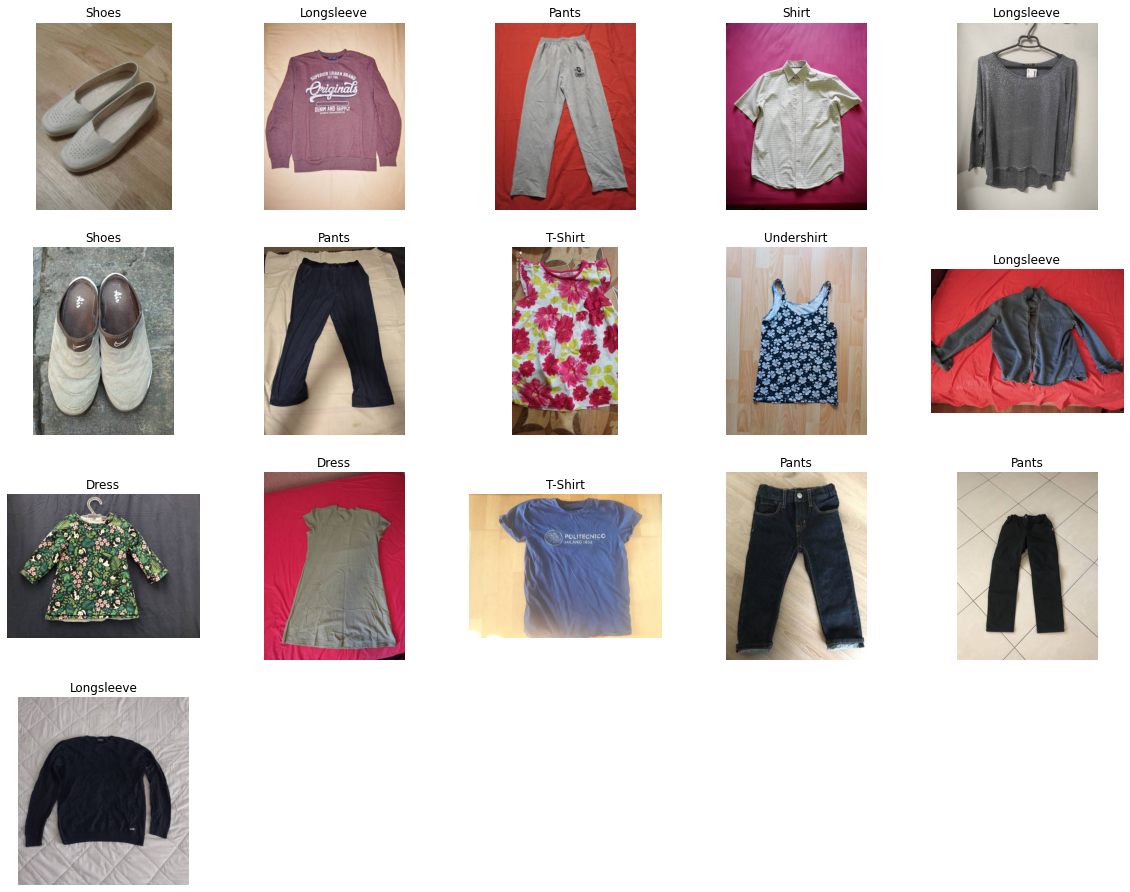

In [22]:
plt.figure(figsize=(20, 20))
for i in range(16):
    ax = plt.subplot(5, 5, i+1)
    show_random_training_image()

# **Data Augmentation**

In [23]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.3,
                                  horizontal_flip=True,
                                  validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=labels1,
    directory=dataset,
    x_col='image',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training'
)

Found 4077 validated image filenames belonging to 17 classes.


In [25]:
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=labels1,
    directory=dataset,
    x_col='image',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False,
    subset='validation'
)

Found 1019 validated image filenames belonging to 17 classes.


## **Create ResNet model50**

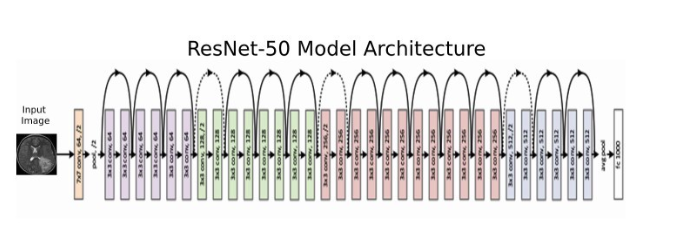

In [26]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [27]:
pretrained_model = ResNet50(input_shape=(224, 224, 3),
                                include_top=False,
                                weights='imagenet')


2022-10-26 17:21:11.827483: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 17:21:11.828858: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 17:21:11.834999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 17:21:11.836325: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 17:21:11.837525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

94781440/94765736 [==============================] - 0s 0us/step


In [28]:
for layer in pretrained_model.layers:
    layer.trainable = True

In [29]:
inputs = pretrained_model.input

x = pretrained_model.output
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64,name='Feature_extractor', activation='relu')(x)
outputs = tf.keras.layers.Dense(17, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [30]:
from tensorflow.keras.optimizers import Adam, SGD
model.compile(Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard
import tensorflow as tf
import datetime, os
es = tf.keras.callbacks.EarlyStopping(patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            #verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

In [53]:
history = model.fit(train_generator, 
                    epochs=10,
                    validation_data=validation_generator, 
                    callbacks= [es, learning_rate_reduction],
                    steps_per_epoch=len(train_generator) //BATCH_SIZE,
                    validation_steps=len(validation_generator) //BATCH_SIZE  )

Epoch 1/10
4/4 [==============================] - 4s 1s/step - loss: 2.0359 - accuracy: 0.3750 - val_loss: 3.0185 - val_accuracy: 0.2500
Epoch 2/10
4/4 [==============================] - 4s 906ms/step - loss: 2.1988 - accuracy: 0.4219 - val_loss: 3.0090 - val_accuracy: 0.2500
Epoch 3/10
4/4 [==============================] - 4s 998ms/step - loss: 1.9907 - accuracy: 0.4453 - val_loss: 2.9372 - val_accuracy: 0.2500
Epoch 4/10
4/4 [==============================] - 4s 902ms/step - loss: 1.8963 - accuracy: 0.4688 - val_loss: 2.9197 - val_accuracy: 0.2500
Epoch 5/10
4/4 [==============================] - 3s 903ms/step - loss: 2.0796 - accuracy: 0.4531 - val_loss: 2.8819 - val_accuracy: 0.2812
Epoch 6/10
4/4 [==============================] - 4s 891ms/step - loss: 2.1326 - accuracy: 0.3906 - val_loss: 2.9183 - val_accuracy: 0.2500
Epoch 7/10
4/4 [==============================] - 4s 889ms/step - loss: 2.4446 - accuracy: 0.3672 - val_loss: 2.8807 - val_accuracy: 0.2188
Epoch 8/10
4/4 [=======

# **Model Performance**

In [34]:
model.save('resnet50.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



In [54]:
loss, accuracy = model.evaluate(validation_generator, verbose=2)


32/32 - 17s - loss: 2.9507 - accuracy: 0.2100


In [55]:
print(f"Model Loss is {loss:.2f} and Accuracy is {100*np.round(accuracy, 4)}%")


Model Loss is 2.95 and Accuracy is 21.0%


In [56]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

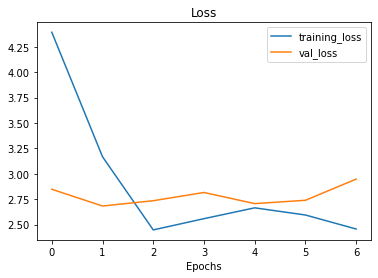

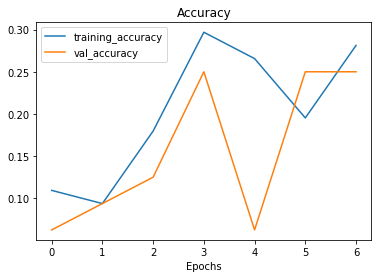

In [38]:
plot_loss_curves(history)

In [57]:
classes = list(train_generator.class_indices.keys())

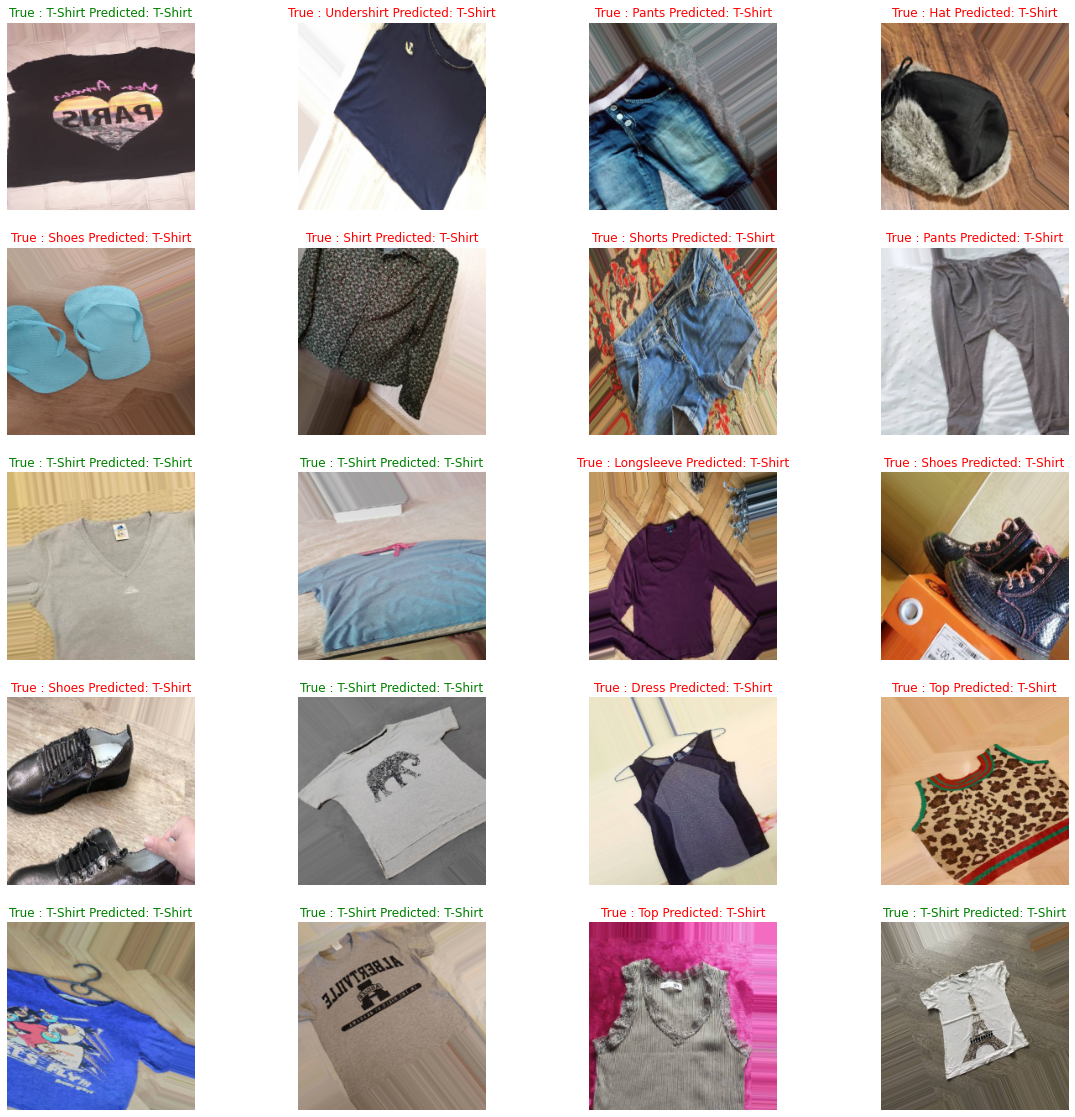

In [58]:
def predict_val_image(index):
    predictions =  model.predict(val_images, verbose=0)[index]
    true_label = classes[val_labels[index].argmax()]
    predicted_label = classes[predictions.argmax()] 

    if(true_label== predicted_label):
        color = 'green'  
    else:
        color = 'red'

    plt.title(f"True : {true_label} Predicted: {predicted_label}", color=color)
    plt.imshow(val_images[index])
    plt.axis('off')
val_images, val_labels = validation_generator.next()
plt.figure(figsize=(20, 20))
for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    predict_val_image(i)

# **Prediction on test images which are not used for training and validation**

In [59]:
custom_dir = '../input/clothing-dataset-full/images_original'

In [60]:
custom_paths = []
for image in os.listdir(custom_dir):
        custom_paths.append(custom_dir+'/'+image)

In [61]:
def predict_random_image():
    path = random.choice(custom_paths)
    image = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    input_arr = input_arr.astype('float32') / 255.
    predictions = model.predict(input_arr, verbose=0)
    series = pd.Series(predictions[0], index=classes)
    predicted_classes = np.argsort(predictions)
    predictions.sort()
    plt.title(f"{classes[predicted_classes[0][-1]]} - {round(predictions[0][-1] * 100,2)}% \n{classes[predicted_classes[0][-2]]} - {round(predictions[0][-2] * 100,2)}% \n{classes[predicted_classes[0][-3]]} - {round(predictions[0][-2] * 100,3)}%")
    plt.imshow(image)
    plt.axis('off')

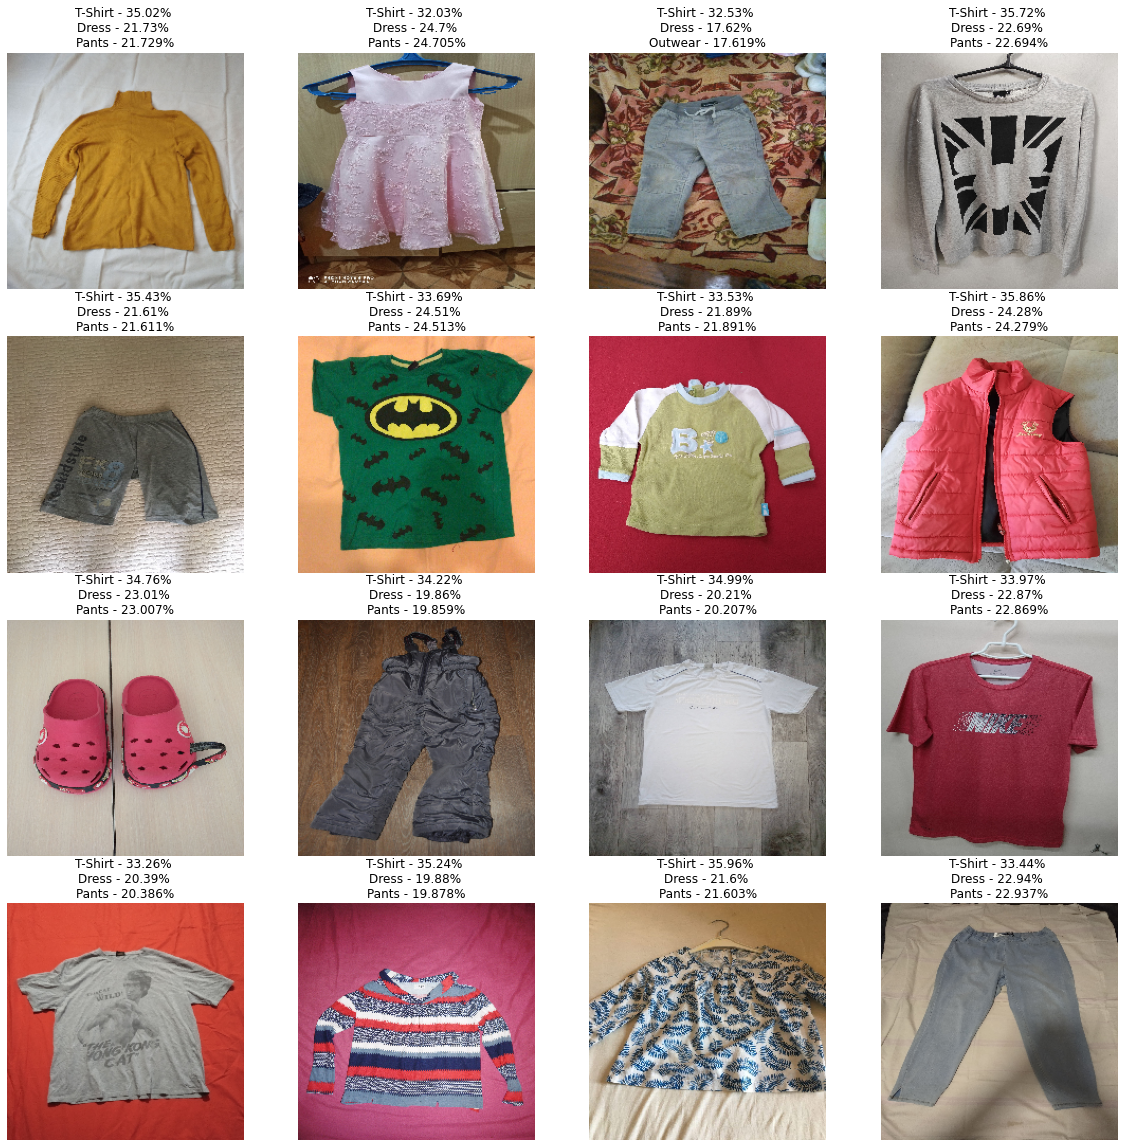

In [62]:
plt.figure(figsize=(20, 20))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    predict_random_image()